In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [6]:
data=pd.read_csv(r'dataset1.csv')

In [11]:
data

,DX_GROUP,DSM_IV_TR,subject,AGE_AT_SCAN,SEX,FIQ,EYE_STATUS_AT_SCAN,anat_cnr,anat_efc,anat_fber,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,1,1,50002,16.77,1,103.0,2,10.201539,1.194664,16.223458,...,0.709169,0.145987,0.573981,1.079048,0.134220,6.668210,0.000000,1.752300,17.515268,5.955179
1,1,1,50003,24.45,1,124.0,2,7.165701,1.126752,10.460008,...,0.000000,0.341641,0.000000,3.089838,0.000000,1.457187,0.000000,0.387380,23.950901,3.587801
2,1,1,50004,19.09,1,113.0,2,7.698144,1.226218,9.725750,...,0.000000,1.229481,0.000000,2.499114,0.000000,2.882995,0.000000,0.116916,15.910932,7.955417
3,1,1,50005,13.73,2,119.0,2,9.071807,1.256278,11.198226,...,0.000000,3.199678,0.000000,4.286026,0.711807,0.000000,0.000000,1.928197,14.744667,5.338909
4,1,1,50006,13.37,1,109.0,2,8.026798,1.407166,6.282055,...,0.000000,1.352294,0.377805,0.707129,0.000000,4.792439,0.000000,1.056621,12.811856,2.673212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1,2,51583,35.00,1,-9999.0,2,3.899774,1.697271,3.465151,...,2.027425,10.180809,0.000000,0.000000,0.000000,2.317079,0.000000,1.292755,7.126568,3.599783
1096,1,2,51584,49.00,1,-9999.0,2,2.757735,1.073076,7.633618,...,1.784619,6.494457,0.000000,2.521507,0.000000,0.000000,0.000000,1.361214,5.367865,0.610961
1097,1,1,51585,27.00,1,-9999.0,2,3.413469,1.358238,4.335700,...,0.542140,7.581014,0.000000,1.033106,0.000000,0.151174,0.000000,0.000000,7.463575,2.034858
1098,1,2,51606,29.00,2,-9999.0,2,7.839007,1.754363,12.270055,...,2.010930,0.000000,0.068670,0.000000,5.233705,6.228088,0.000000,0.871909,13.715996,9.897217


In [12]:
data['DX_GROUP']=data['DX_GROUP'].replace(2,0)

In [10]:
data.drop('Unnamed: 0.1',axis=1,inplace=True)

In [13]:
#train test split
X = data.drop("DX_GROUP",axis = 1)
y = data['DX_GROUP']


In [8]:
y.unique()

array([1, 0], dtype=int64)

In [14]:
y.unique()

array([1, 0], dtype=int64)

In [15]:
from sklearn.model_selection import train_test_split

np.random.seed(1234)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=100,stratify=y)


# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

y_train.shape

Training set has 880 samples.
Testing set has 220 samples.


(880,)

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    f1 = f1_score(true, predicted)
    cm = confusion_matrix(true, predicted)
    return accuracy, precision, recall, f1, cm


In [17]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(),
    "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

list(models.keys())

['Logistic Regression',
 'Decision Tree',
 'Random Forest Classifier',
 'XGBClassifier',
 'CatBoosting Classifier',
 'AdaBoost Classifier']

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
model_list = []
acc_list =[]
prec_list=[]
recall_list=[]
f1_list=[]
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_accuracy, train_precision, train_recall, train_f1, train_confusion=evaluate_model(y_train, y_train_pred)
    test_accuracy, test_precision, test_recall, test_f1, test_confusion=evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("-accuracy: {:.4f}".format(train_accuracy))
    print("- Precision {:.4f}".format(train_precision))
    print("- Recall: {:.4f}".format(train_recall))
    print("- F1_Score {:.4f}".format(train_f1))
    print("- Confusion Matrix\n ",train_confusion)

    print('----------------------------------')
    
    print('Model performance for testing set')
    print("-accuracy: {:.4f}".format(test_accuracy))
    print("- Precision {:.4f}".format(test_precision))
    print("- Recall: {:.4f}".format(test_recall))
    print("- F1_Score {:.4f}".format(test_f1))
    print("- Confusion Matrix\n",test_confusion)
    acc_list.append(test_accuracy)
    prec_list.append(test_precision)
    recall_list.append(test_recall)
    f1_list.append(test_f1)
    print('='*35)
    print('\n')
    
    

Logistic Regression
Model performance for Training set
-accuracy: 0.6205
- Precision 0.6500
- Recall: 0.4599
- F1_Score 0.5387
- Confusion Matrix
  [[351 105]
 [229 195]]
----------------------------------
Model performance for Training set
-accuracy: 0.5636
- Precision 0.5758
- Recall: 0.3585
- F1_Score 0.4419
- Confusion Matrix
 [[86 28]
 [68 38]]


Decision Tree
Model performance for Training set
-accuracy: 1.0000
- Precision 1.0000
- Recall: 1.0000
- F1_Score 1.0000
- Confusion Matrix
  [[456   0]
 [  0 424]]
----------------------------------
Model performance for Training set
-accuracy: 0.9727
- Precision 0.9808
- Recall: 0.9623
- F1_Score 0.9714
- Confusion Matrix
 [[112   2]
 [  4 102]]


Random Forest Classifier
Model performance for Training set
-accuracy: 1.0000
- Precision 1.0000
- Recall: 1.0000
- F1_Score 1.0000
- Confusion Matrix
  [[456   0]
 [  0 424]]
----------------------------------
Model performance for Training set
-accuracy: 0.8409
- Precision 0.8737
- Recall: 0

In [20]:
results=pd.DataFrame(list(zip(model_list, acc_list,prec_list,f1_list,recall_list)), columns=['Model Name', 'Accuracy','Precision','F1-Score','Recall']).sort_values(by=["Accuracy"],ascending=False)
results

,Model Name,Accuracy,Precision,F1-Score,Recall
3,XGBClassifier,0.986364,0.990476,0.985782,0.981132
5,AdaBoost Classifier,0.981818,0.990385,0.980952,0.971698
1,Decision Tree,0.972727,0.980769,0.971429,0.962264
4,CatBoosting Classifier,0.963636,0.990000,0.961165,0.933962
2,Random Forest Classifier,0.840909,0.873684,0.825871,0.783019
0,Logistic Regression,0.563636,0.575758,0.441860,0.358491


In [11]:
results.to_csv('resultsdense10.csv')

In [26]:
import os
print(os.getcwd())

C:\Users\chand\Desktop\Projects\Feature_Extraction


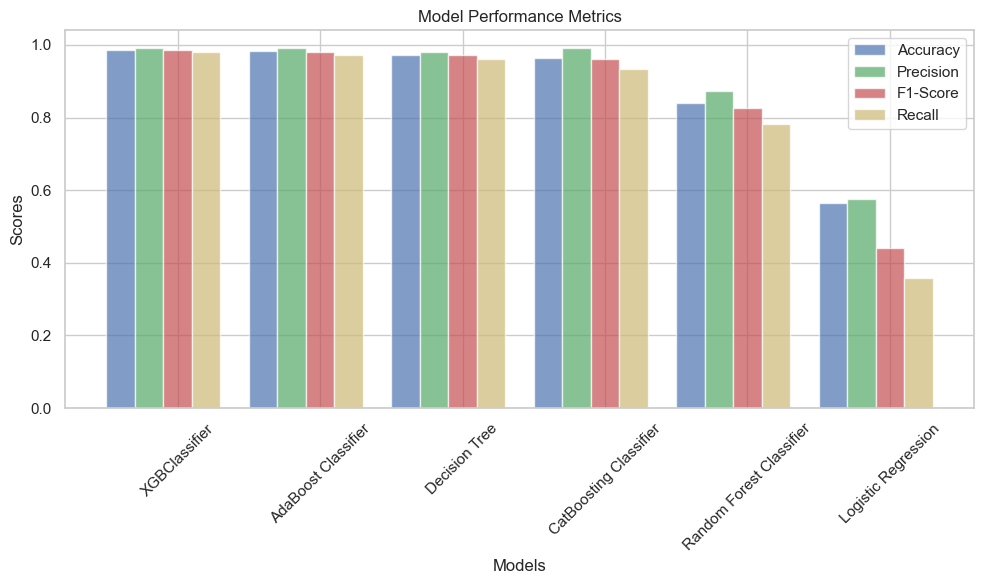

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# # Data
# model_names = ["AdaBoost", "CatBoost", "Decision Tree", "XGBoost", "Random Forest", "Logistic Regression"]
# accuracy = [0.995455, 0.990909, 0.981818, 0.981818, 0.972727, 0.581818]
# precision = [0.990654, 0.990566, 0.990385, 0.990385, 1.000000, 0.640000]
# f1_score = [0.995305, 0.990566, 0.980952, 0.980952, 0.970874, 0.410256]
# recall = [1.000000, 0.990566, 0.971698, 0.971698, 0.943396, 0.301887]

# # Create a DataFrame
# data = {
#     "Model Name": model_names,
#     "Accuracy": accuracy,
#     "Precision": precision,
#     "F1-Score": f1_score,
#     "Recall": recall
# }

df = results

# Set the width of the bars
bar_width = 0.2
model_names=df['Model Name']
# Set the positions of the bars on the x-axis
index = np.arange(len(model_names))

# Create subplots for each metric
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each metric
plt.bar(index - bar_width, df['Accuracy'], bar_width, label='Accuracy', color='b', alpha=0.7)
plt.bar(index, df['Precision'], bar_width, label='Precision', color='g', alpha=0.7)
plt.bar(index + bar_width, df['F1-Score'], bar_width, label='F1-Score', color='r', alpha=0.7)
plt.bar(index + 2 * bar_width, df['Recall'], bar_width, label='Recall', color='y', alpha=0.7)

# Set labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Metrics')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(model_names, rotation=45)
plt.legend()

# Display the plot
plt.tight_layout()
plt.savefig(r'C:\Users\chand\Desktop\Projects\Feature_Extraction\results.png')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# # Data
# model_names = ["AdaBoost", "CatBoost", "Decision Tree", "XGBoost", "Random Forest", "Logistic Regression"]
# accuracy = [0.995455, 0.990909, 0.981818, 0.981818, 0.972727, 0.581818]
# precision = [0.990654, 0.990566, 0.990385, 0.990385, 1.000000, 0.640000]
# f1_score = [0.995305, 0.990566, 0.980952, 0.980952, 0.970874, 0.410256]
# recall = [1.000000, 0.990566, 0.971698, 0.971698, 0.943396, 0.301887]

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
index = np.arange(len(model_names))

# Create subplots for each metric
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each metric
plt.bar(index - bar_width, accuracy, bar_width, label='Accuracy', color='b', alpha=0.7)
plt.bar(index, precision, bar_width, label='Precision', color='g', alpha=0.7)
plt.bar(index + bar_width, f1_score, bar_width, label='F1-Score', color='r', alpha=0.7)
plt.bar(index + 2 * bar_width, recall, bar_width, label='Recall', color='y', alpha=0.7)

# Set labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Metrics')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(model_names, rotation=45)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# Creating plot to show the ROC for all MLA
index = 1
for alg in MLA:
    
    
    predicted = alg.fit(x_train, y_train).predict(x_test)
    fp, tp, th = roc_curve(y_test, predicted)
    roc_auc_mla = auc(fp, tp)
    MLA_name = alg.__class__.__name__
    plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (MLA_name, roc_auc_mla))
   
    index+=1

plt.title('ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')    
plt.show()

In [62]:
# Importing necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# # Load the dataset (for example, the Iris dataset)
# iris = datasets.load_iris()
# X = iris.data
# y = iris.target

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='sigmoid')  # You can change the kernel if needed (linear, polynomial, RBF, etc.)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.5181818181818182

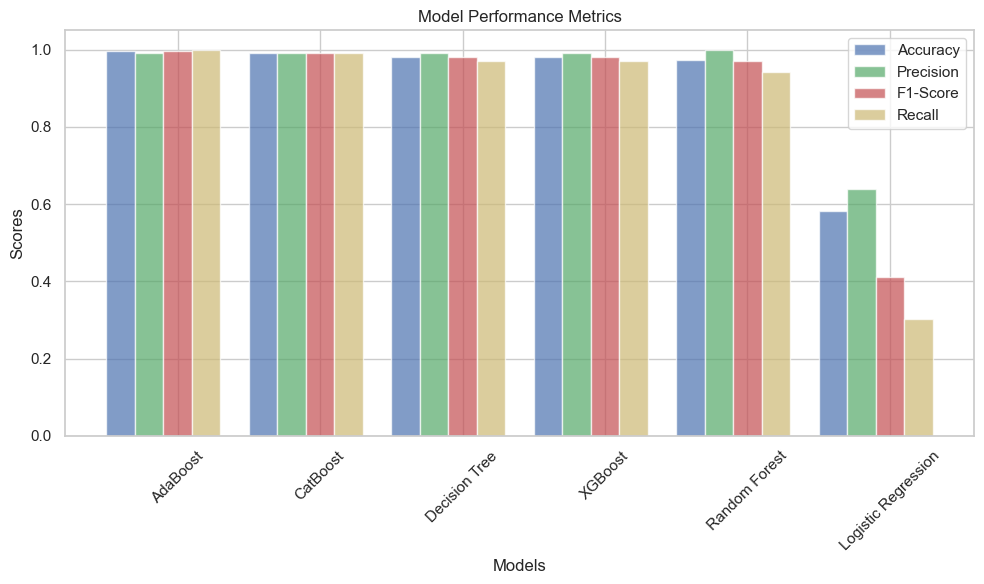